#**AI-Powered Toxic Comment Classifier**#

##**Introduction**##

Toxic Comments on online platforms harm user experience and community saety. This project builds a machine learning model to automatically detect and classify harmful content like insults, threats and hate speech, helping platforms moderate comments more effectively. The brief description of toxicity types is as follows:

---

1. **Toxic**
   A **general term** for any rude, disrespectful, or unreasonable comment that is likely to make people leave a discussion. It often serves as an umbrella category.

2. **Severe Toxic**
   A **more extreme form** of toxic content, often involving threats, incitement to violence, or deeply hateful remarks that can cause serious emotional harm.

3. **Obscene**
   Comments that include **offensive language**, vulgarity, or sexually explicit terms that violate decency norms or community guidelines.

4. **Threat**
   Comments that express an **intention to inflict pain, injury, damage, or other hostile actions** — directly or indirectly — on individuals or groups.

5. **Insult**
   Comments that contain **rude, mocking, or demeaning language** aimed at a person or group, often meant to hurt or belittle.

6. **Identity Hate**
   Comments that express **hatred or strong bias against people based on their identity**, such as race, religion, gender, sexual orientation, or nationality.

---

##**Load dataset**##


In [1]:
import pandas as pd

In [2]:
#importing file from github
train_url = 'https://raw.githubusercontent.com/praj2408/Jigsaw-Toxic-Comment-Classification/main/data_given/train.csv/train.csv'
test_url = 'https://raw.githubusercontent.com/praj2408/Jigsaw-Toxic-Comment-Classification/main/data_given/test.csv/test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

print("First 5 records of train.csv:", train_df.head())
print("First 5 records of test.csv:", test_df.head())

First 5 records of train.csv:                  id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
First 5 records of test.csv:                  id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Ru



---


##**Exploratory Data Analysis**

In [ ]:
train_df.shape

(159571, 8)

In [ ]:
train_df.shape[0]

159571

In [ ]:
train_df.shape[1]

8

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
train_df.describe() #note this works only on categorical data columns

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df.isnull() #displays table and show which entries are null

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


In [ ]:
train_df.isnull().sum() #Displays total number of null entries

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0




---


##**Data Visusalisation**

Distribution of each target in the training data:


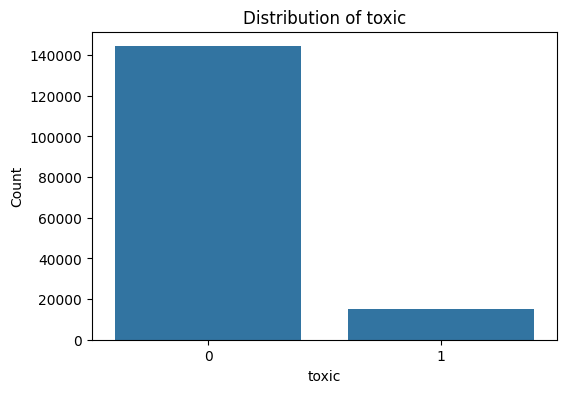

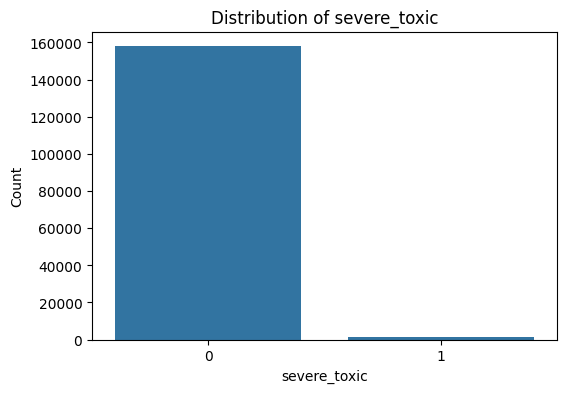

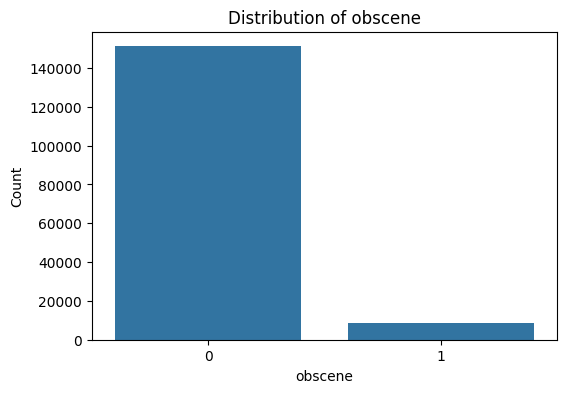

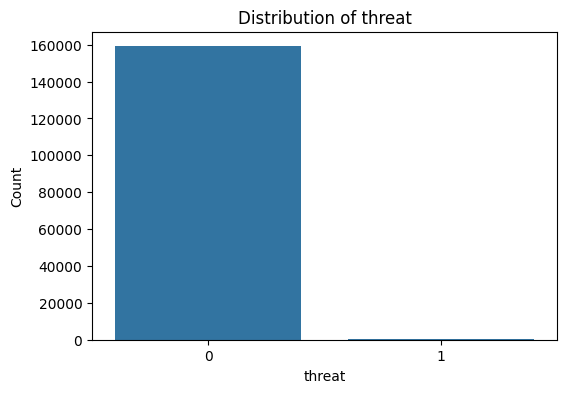

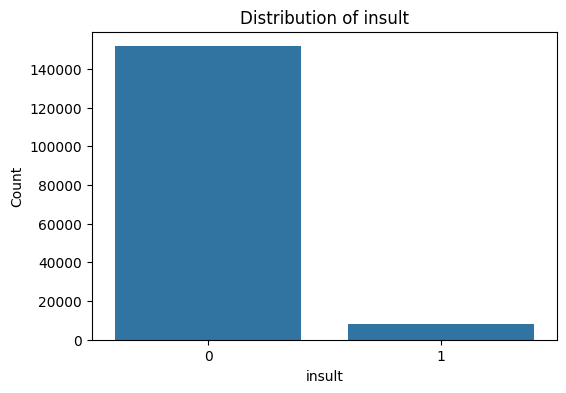

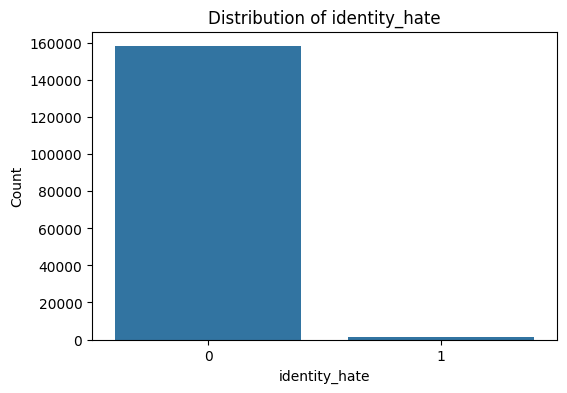

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("Distribution of each target in the training data:")

for col in target_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

From the visualisation, we can see that the untagged comments are way more than the tagged comments.

Now we check the numerical count of tagged comments and untagged comments.

In [3]:
import pandas as pd

print("Numerical check for class imbalance in the training data:")

for col in target_columns:
    print(f"\nDistribution for column: '{col}'")
    value_counts = train_df[col].value_counts()
    print(value_counts)
    percentage = train_df[col].value_counts(normalize=True) * 100
    print(f"Percentage:\n{percentage.round(2)}")

Numerical check for class imbalance in the training data:

Distribution for column: 'toxic'
toxic
0    144277
1     15294
Name: count, dtype: int64
Percentage:
toxic
0    90.42
1     9.58
Name: proportion, dtype: float64

Distribution for column: 'severe_toxic'
severe_toxic
0    157976
1      1595
Name: count, dtype: int64
Percentage:
severe_toxic
0    99.0
1     1.0
Name: proportion, dtype: float64

Distribution for column: 'obscene'
obscene
0    151122
1      8449
Name: count, dtype: int64
Percentage:
obscene
0    94.71
1     5.29
Name: proportion, dtype: float64

Distribution for column: 'threat'
threat
0    159093
1       478
Name: count, dtype: int64
Percentage:
threat
0    99.7
1     0.3
Name: proportion, dtype: float64

Distribution for column: 'insult'
insult
0    151694
1      7877
Name: count, dtype: int64
Percentage:
insult
0    95.06
1     4.94
Name: proportion, dtype: float64

Distribution for column: 'identity_hate'
identity_hate
0    158166
1      1405
Name: count, dtype

In [4]:
#Check the comments with multiple toxicity tag
# Sum the toxicity tags for each comment

train_df['total_toxicity_types'] = train_df[target_columns].sum(axis=1)

# Count how many comments have more than one toxicity tag
comments_with_multiple_tags = train_df[train_df['total_toxicity_types'] > 1].shape[0]

print(f"Number of comments with multiple toxicity tags: {comments_with_multiple_tags}")

Number of comments with multiple toxicity tags: 9865


In [ ]:
# Count how many comments have at least one toxicity tag
comments_with_tags = train_df[train_df['total_toxicity_types'] != 0].shape[0]
comments_with_tags

16225

In [ ]:
train_df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_toxicity_types
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,0




---


##**Text Preprocessing**

In [ ]:
#this is a crucial step when dealing with text

In [5]:
pip install -U spacy

In [10]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Check if text is a string, otherwise return empty string
    if not isinstance(text, str):
        return ""
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

In [11]:
# Apply preprocessing to training dataset
train_df['cleaned_text'] = train_df['comment_text'].apply(preprocess)

In [12]:
# Display the first few rows of the cleaned dataframes to verify
print("Cleaned Training Data:")
print(train_df[['comment_text', 'cleaned_text']].head())

Cleaned Training Data:
                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                        cleaned_text  
0  explanation \n edit username hardcore metallic...  
1  d'aww match background colour seemingly stuck ...  
2  hey man try edit war guy constantly remove rel...  
3  \n \n real suggestion improvement wonder secti...  
4                      sir hero chance remember page  


Convert the preprocessed text into numerical representations using:

* Bag of Words (BoW)
* Term Frequency-Inverse Document Frequency (TF-IDF)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# Bag of Words Representation
bow_vectorizer = CountVectorizer(max_features=5000)
bow_matrix = bow_vectorizer.fit_transform(train_df['cleaned_text'])

print("Bag of Words Matrix Shape:", bow_matrix.shape)

# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

print("\nComparison of Feature Matrix Shapes:")
print(f"Bag of Words: {bow_matrix.shape}")
print(f"TF-IDF: {tfidf_matrix.shape}")
# The shapes are the same because both use the same number of features (5000 in this case).
# The difference lies in how the values within the matrix are calculated (counts vs. TF-IDF scores).

Bag of Words Matrix Shape: (159571, 5000)
TF-IDF Matrix Shape: (159571, 5000)

Comparison of Feature Matrix Shapes:
Bag of Words: (159571, 5000)
TF-IDF: (159571, 5000)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Train-Test Split (using the TF-IDF matrix and all target columns)
X_train, X_test, y_train_all, y_test_all = train_test_split(tfidf_matrix, train_df[target_columns], test_size=0.2, random_state=42)

# Train a separate Logistic Regression model for each target column
models = {}
accuracy_scores = {}

for target in target_columns:
    print(f"Training model for target: {target}")
    y_train = y_train_all[target]
    y_test = y_test_all[target]

    model = LogisticRegression(C= 10.0, max_iter=1000)
    model.fit(X_train, y_train)

    # Store the trained model
    models[target] = model

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    accuracy_scores[target] = accuracy
    print(f"Model Accuracy for {target}: {accuracy * 100:.2f}%\n")

print("\nOverall Accuracy Scores:")
for target, accuracy in accuracy_scores.items():
    print(f"{target}: {accuracy * 100:.2f}%")

Training model for target: toxic
Model Accuracy for toxic: 95.90%

Training model for target: severe_toxic
Model Accuracy for severe_toxic: 99.00%

Training model for target: obscene
Model Accuracy for obscene: 97.95%

Training model for target: threat
Model Accuracy for threat: 99.78%

Training model for target: insult
Model Accuracy for insult: 97.08%

Training model for target: identity_hate
Model Accuracy for identity_hate: 99.17%


Overall Accuracy Scores:
toxic: 95.90%
severe_toxic: 99.00%
obscene: 97.95%
threat: 99.78%
insult: 97.08%
identity_hate: 99.17%




---


##**Predictions**

In [ ]:
pred = pd.DataFrame(test_predictions)
pred.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,0,1,0,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report for each target:")
for target in target_columns:
    print(f"\n--- {target} ---")
    # Get the true labels for the current target from the test set split
    y_true = y_test_all[target]
    # Get the trained model for this target
    model = models[target]
    # Make predictions on the test set split (X_test)
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred))

Classification Report for each target:

--- toxic ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.86      0.68      0.76      3056

    accuracy                           0.96     31915
   macro avg       0.91      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915


--- severe_toxic ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.51      0.30      0.37       321

    accuracy                           0.99     31915
   macro avg       0.75      0.65      0.68     31915
weighted avg       0.99      0.99      0.99     31915


--- obscene ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30200
           1       0.89      0.71      0.79      1715

    accuracy                           0.98     31915
   macro avg       0.94      0.85  

In [15]:
#download the model

import joblib
joblib.dump(models, 'toxic_models.joblib')

['toxic_models.joblib']

In [ ]:
#download the vectoriser

joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']